In [1]:
#Importing the libraries to be used.
#Importing pandas library.
import pandas as pd
#Importing numpy library.
import numpy as np
#Importing seaborn library.
import seaborn as sns 
#Importing pandas library.
import matplotlib.pyplot as plt 
#Importing Counter library.
from collections import Counter 
#Importing display and HTML library.
from IPython.display import display, HTML 
#Importing missingo library.
import missingno 
#Importing preprocessing library from sklearn.
from sklearn import preprocessing 
#Importing regular expression operations library.
import re 

#Importing warnings library.
import warnings 
warnings.filterwarnings("ignore")

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
class readContants():
    constants_ = {}
    def __init__(self):
        super().__init__()        
         # open second page as next page
        import csv
        reader = csv.reader(open('constantsForIpynb.csv', 'r'))        
        for row in reader:
            k, v = row
            k=k+""
            v=v+""            
            self.constants_[str(k)] = str(v)        
    def getConstValue(self,const_name):
        return self.constants_[const_name]

In [4]:
const__ = readContants()

In [5]:
#Reading titles from the messages.csv file.
messages = pd.read_csv(const__.getConstValue("MESSAGES_FILE_NAME"))

In [6]:
def getMessageFromMessageCsv(index):
    return messages["Message"][index]

In [7]:
def printTitle(titleId):
    print(getMessageFromMessageCsv(titleId))
def printBoldTitle(titleId):
    print(color.BOLD + getMessageFromMessageCsv(titleId))    

In [8]:
#Printing zeroth message as a h1 title in html code.
printBoldTitle(60)

Data Fields and Types


In [9]:
class DataInfo:
    attrname = []
    attrtype = []
    factororresponse = []
    noOfAttributes = 0
    attribute_datas = []
    
    def __init__(self):
        self.attribute_datas = pd.read_csv(const__.getConstValue("DATA_INFO_FILE_PATH"))         
        self.setAttributeName(self.attribute_datas.attrname)
        self.setAttributeType(self.attribute_datas.attrtype)
        self.setFactorOrResponse(self.attribute_datas.factororresponse)
        self.getNoOfAttributes(list(self.attribute_datas.columns))
        
    def setAttributeName(self,attributeName):
         self.attrname = attributeName
    
    def setAttributeType(self,attributeType):
         self.attrtype = attributeType
    
    def setFactorOrResponse(self,factorOrResponse):
         self.factororresponse = factorOrResponse
    
    def getNoOfAttributes(self,columns):        
        for col in columns:
            if col != "attrname" and col != "attrtype" and col != "factororresponse":
                self.noOfAttributes = self.noOfAttributes + 1
            
datainfo = DataInfo()    

In [10]:
#Reading the information of the data set in the datainfo.csv file.
#attribute_datas = pd.read_csv(const_.getConstValue("DATA_INFO_FILE_PATH")) 
#Printing attribute_datas values using display library.
print("attribute_datas",display(datainfo.attribute_datas)) 

,attrname,attrtype,factororresponse
0,SepalLength,numeric,factor
1,SepalWidth,numeric,factor
2,PetalLength,numeric,factor
3,PetalWidth,numeric,factor
4,IrisClass,nominal,response


attribute_datas None


In [11]:
class DataInfoAttribute(object):
    response_attributes  = []
    
    non_factor_attributes = []
    non_factor_attributesname = []
    
    factor_attributes = []
    factor_attributesname = []
    
    nominal_attributes = []
    numeric_attributes = []    
    binary_attributes = []
    
    
    def __init__(self):
        pass

In [12]:
class AdditionDataInfo:     
    factor_attributes = []
    attribute_datas = []
    dataInfo = DataInfoAttribute()
    # parameterized constructor
    def __init__(self):
        #self.attribute_datas= attribute_datas
        self.get_response_attributes()
        self.get_non_factor_attributes()
        self.get_factor_attributes()
        self.get_nominal_attributes()
        self.get_numeric_attributes()
        self.get_non_factor_attributes()
        self.get_binary_attributes()
        
    def get_response_attributes(self):
        response_attributes = datainfo.attribute_datas[(datainfo.factororresponse=="response") | (datainfo.factororresponse=="target")]["attrname"].values[0]        
        #print("response_attributes: ",response_attributes) 
        DataInfoAttribute.response_attributes = response_attributes
    
    def get_non_factor_attributes(self):
        non_factor_attributes = datainfo.attribute_datas[(datainfo.factororresponse!="factor") & (datainfo.factororresponse!="attribute") & (datainfo.factororresponse!="response") &  (datainfo.factororresponse!="target") ] 
        #print("response_attributes: ",non_factor_attributes) 
        DataInfoAttribute.non_factor_attributesname = non_factor_attributes["attrname"].values
        DataInfoAttribute.non_factor_attributes = non_factor_attributes
        
    def get_factor_attributes(self):
        self.factor_attributes = datainfo.attribute_datas[(datainfo.factororresponse=="factor") | (datainfo.factororresponse=="attribute")]
        #print("response_attributes: ",non_factor_attributes) 
        DataInfoAttribute.factor_attributesname = self.factor_attributes["attrname"].values
        DataInfoAttribute.factor_attributes = self.factor_attributes
    
    def get_nominal_attributes(self):
        nominal_attributes = datainfo.attribute_datas[(datainfo.attrtype == "nominal") | (datainfo.attrtype == "categorical")]["attrname"].values         
        #print("response_attributes: ",response_attributes) 
        DataInfoAttribute.nominal_attributes = nominal_attributes
        
    def get_numeric_attributes(self):
        numeric_attributes = self.factor_attributes[(datainfo.attrtype == "numeric") | (datainfo.attrtype == "numerical")]["attrname"].values
        #print("response_attributes: ",response_attributes) 
        DataInfoAttribute.numeric_attributes = numeric_attributes
        
    def get_binary_attributes(self):
        binary_attributes = self.factor_attributes[datainfo.attrtype == "binary"]["attrname"].values
        #print("response_attributes: ",response_attributes) 
        DataInfoAttribute.binary_attributes = binary_attributes
    
 
    def getDataInfoObject(self):
        return self.dataInfo
    
# this will invoke parameterized constructor
obj = AdditionDataInfo()

# display result
datainfo_attr_type_obj = obj.getDataInfoObject()

In [13]:
#Printing second message as a h1 title in html code.
printTitle(2)

Getting a Response Column


In [14]:
response_attributes = datainfo_attr_type_obj.response_attributes
print("response_attributes: ",response_attributes) 

response_attributes:  IrisClass


In [15]:
#Printing third message as a h1 title in html code.
printTitle(3)

Getting a Non-Factor Column


In [16]:
non_factor_attributesname = datainfo_attr_type_obj.non_factor_attributesname
#Printing non_factor_attributesname values.
print("non_factor_attributesname: ",non_factor_attributesname) 

non_factor_attributesname:  []


In [17]:
#Printing fourth message as a h1 title in html code.
printTitle(4)

Getting a Factor Column


In [18]:
factor_attributesname = datainfo_attr_type_obj.factor_attributesname
#Printing non_factor_attributesname values.
print("factor_attributesname: ",factor_attributesname) 

factor_attributesname:  ['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth']


In [19]:
#Printing fifth message as a h1 title in html code.
printTitle(5)

Getting a Nominal Type Column


In [20]:
nominal_attributes = datainfo_attr_type_obj.nominal_attributes
#Printing nominal_attributes values.
print("nominal_attributes: ",nominal_attributes)

nominal_attributes:  ['IrisClass']


In [21]:
#Printing sixth message as a h1 title in html code.
printTitle(6)

Getting a Numeric Type Column


In [22]:
#Assigning the features whose attribute value is numeric.
numeric_attributes = datainfo_attr_type_obj.numeric_attributes
#print numeric_attributes values.
print("numeric_attributes: ",numeric_attributes)

numeric_attributes:  ['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth']


In [23]:
#Printing seventh message as a h1 title in html code.
printTitle(7)

Getting a Binary Type Column


In [24]:
#Assigning the features whose attribute value is binary.
binary_attributes = datainfo_attr_type_obj.binary_attributes 
#print binary_attributes values.
print("binary_attributes: ",binary_attributes)

binary_attributes:  []


In [25]:
#Printing eighth message as a h1 title in html code.
printBoldTitle(61)

Sample Data


In [26]:
#Loading our dataset in the dataset.xlsx file.
data = pd.read_excel(const__.getConstValue("DATASET_FILE_PATH"))

In [27]:
#Stripping the spaces in the attribute name in our dataset.
data.rename(columns = lambda x: x.strip(), inplace=True)

In [28]:
#We convert the empty or unnecessary values in our dataset to the np.nan value.
#It will be easy to read.
for col in data.columns:
    
    data[col].replace(["?"," ","","NA",'NA'],np.nan,inplace=True)

In [29]:
#Printing data's head values using display library
print("data head",display(data.head()))

,SepalLength,SepalWidth,PetalLength,PetalWidth,IrisClass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


data head None


In [30]:
#Printing ninth message as a h1 title in html code.
printTitle(9)

Data Columns


In [31]:
#Printing the columns of our dataset.
print("data columns: ",data.columns)

data columns:  Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'IrisClass'], dtype='object')


In [32]:
#Printing tenth message as a h1 title in html code.
printBoldTitle(62)

Summary Statistics


In [33]:
#Examining the information about our dataset by printing the info values.
#print("data info: ",data.info(null_counts=False))

In [34]:
#Printing eleventh message as a h1 title in html code. 
printTitle(11)

Data Describe


In [35]:
#We observe the statistical values of numeric values using display library by print data describe.
print("data.describe",display(data.describe().T))

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


data.describe None


In [36]:
#Printing eleventh message as a h1 title in html code. 
printBoldTitle(63)

Data Count and Values


In [37]:
#Applying the count operation for each attribute in our dataset.
print("data count:\n",data.count())

data count:
 SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
IrisClass      150
dtype: int64


In [38]:
#Printing twelfth message as a h1 title in html code.
printTitle(12)

Data Shape


In [39]:
#Printing the number of columns and rows of our dataset.
print("data shape",data.shape)

data shape (150, 5)


In [40]:
#Printing fifty-fifth message as a h1 title in html code.
printTitle(13)

Displaying Counted Unique Values of Nominal Attributes


In [41]:
#Finding the unique values by applying the count operation to the nominal attribute values of our dataset.
for col in nominal_attributes:
    #Printing nominal column
    print("Column > {} < unique values\n".format(col))
    #Printing unique values name in nominal features of data.
    print(data[col].unique())
    #Printing count unique values in nominal features of data.
    print("\nColumn > {} < unique values count:{}".format(col,data[col].nunique()))

Column > IrisClass < unique values

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Column > IrisClass < unique values count:3


In [42]:
#Stripping  the spaces in data whose data dtype is a object
#def trim(x):
  #  if x.dtype == object: 
  #      x = x.astype(str).str.strip()
 #   return(x)

#Calling trim function to apply data.
#data = data.apply(trim)

In [43]:
#Selecting data whose data type is object and assign to data_objects.
data_objects = data.select_dtypes(['object'])
#Printing data_objects's columns name.
print(data_objects.columns)
#Applying the strip operation to the string attribute values (which are the object type).
data[data_objects.columns] = data_objects.apply(lambda x: x.str.strip())

print("data head:")
#Printing data head usign display library.
print(display(data.head()))

Index(['IrisClass'], dtype='object')
data head:


,SepalLength,SepalWidth,PetalLength,PetalWidth,IrisClass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


None


In [44]:
#We replace some data values("?"," ","","NA",'NA') with np.nan value.
#for col in data.columns:
#    data[col].replace(["?"," ","","NA",'NA'],np.nan,inplace=True)

In [45]:
#Printing thirteenth message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(14)))
printBoldTitle(64)

Columns to be Dropped


In [46]:
#Keep the attribute values that will not used in data analysis in the array.
dropping_columns = []
#Keep the attribute values that will be used in data analysis in the array.
processing_columns = []

for col in factor_attributesname:
    #Applying count processing to data features.
    shape_val_count = data[col].value_counts().shape[0]
    #In the value count operation, if the count value is greater than 1 or 10 and the feature is not found in both numeric and resonse attribute values,
    #I insert it into the drop array.
    if((shape_val_count == 1 or shape_val_count > 10) and col not in numeric_attributes and col not in response_attributes):
        dropping_columns.append(col)
    #If the count value is greater than 1 and less than 10 or if the feature is in the numeric attribute,
    #I insert it into the process array.
    if((shape_val_count > 1 and shape_val_count < 10) or col in numeric_attributes):
        processing_columns.append(col) 
for col in non_factor_attributesname:
    #if data column in non_factor_attributesname,we will assign it to dropping column.
    dropping_columns.append(col)

In [47]:
#Printing the dropping array.
print("dropping_columns : ",dropping_columns)

dropping_columns :  []


In [48]:
#Printing the processing array.
print("processing_columns : ",processing_columns)

processing_columns :  ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


In [49]:
#Printing fourteenth message as a h1 title in html code.
printTitle(56)

Univariate Analysis


In [50]:
#Printing fourteenth message as a h1 title in html code.
printBoldTitle(65)

Box Plots for Numeric Attributes


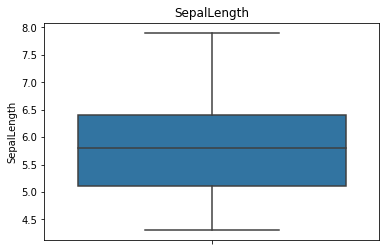

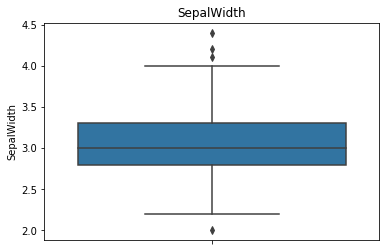

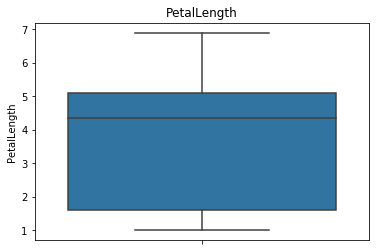

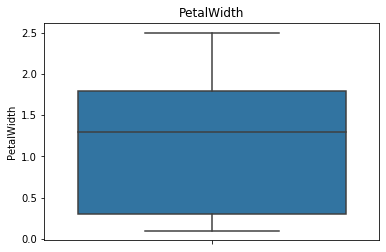

In [51]:
#box_plots function takes attribute and dataset as parameters.
def box_plots(col,data):
    #box plot assign col parametre to y axis,data parametre to data value.
    sns.boxplot(y=col, data=data)
    #column value assigned to plot title.
    plt.title(col)
    #plot show function to display data analsis
    plt.show()

for i,col in enumerate(numeric_attributes):
    #call box_plots function to show numeric attribute data values.
     box_plots(col,data)

In [52]:
#Printing fifteenth message as a h1 title in html code.
printBoldTitle(66)

Frequency Charts for Nominal(Categorical) Attributes


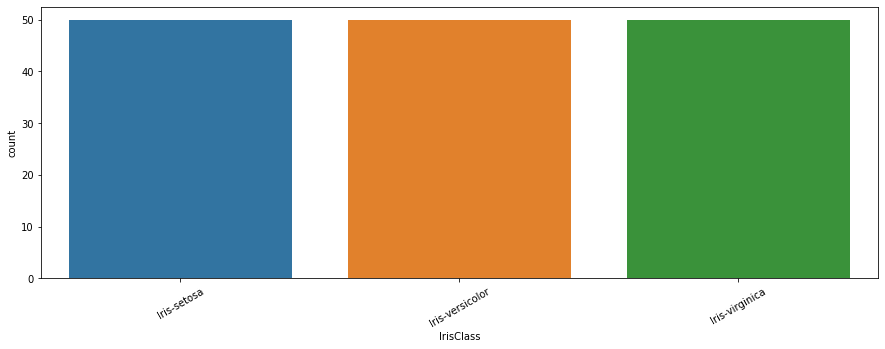

IrisClass : 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: IrisClass, dtype: int64
A number of Class : 3 


In [53]:
#categorical_variable_displayer function takes column value as parameter.
def categorical_variable_displayer(column):
    #set figure size with figsize parametre.
    plt.figure(figsize=(15,5))
    #assign data[column].value_counts() to variableValue.
    variableValue = data[column].value_counts()
    #assign variableValue's shape[0] to shape_val_count.
    shape_val_count = variableValue.shape[0]
    #set column to x axis, data to data,order to data[column].value_counts().iloc[:shape_val_count].index.
    sns.countplot(x = column,data = data,order= data[column].value_counts().iloc[:shape_val_count].index)
    #set rotation angle to x axis's titles.
    plt.xticks(rotation=30)
    #plot show function to display data analsis
    plt.show()
    #Printing column and variableValue.
    print("{} : \n{}".format(column,variableValue))
    #Printing variableValue.length.
    print("A number of Class : {} ".format(len(variableValue.index)))
   
    
for categories in nominal_attributes:
    #Calling categorical_variable_displayer for nominal attribute.
    categorical_variable_displayer(categories)

In [54]:
#Printing sixteenth message as a h1 title in html code.
printTitle(17)

Displaying Binary Variables


In [55]:
#binary_categorical_variable_displayer function takes column value as parameter.
def binary_categorical_variable_displayer(column):
    #set figure size with figsize parametre.
    plt.figure(figsize=(6,4))
    #assign data[column].value_counts() to data_column_value_counts.
    data_column_value_counts = data[column].value_counts()
    #set column to x axis, data to data,
    sns.countplot(x = column,data = data)    
    #plot show function to display data analysis
    plt.show()
    #Printing column and data_column_value_counts.
    print("{} : \n{}".format(column,data_column_value_counts))
     #Printing data_column_value_counts.length.
    print("A number of Class : {} ".format(len(data_column_value_counts.index)))

In [56]:
for column in binary_attributes:
    #Calling binary_categorical_variable_displayer for nominal attribute.
    binary_categorical_variable_displayer(column)

In [57]:
#Printing seventeenth message as a h1 title in html code.
printBoldTitle(67)

Pie Charts for Nominal(Categorical) Attributes


In [58]:
#response_variables_grouped_displayer function takes column value as parameter.
def response_variables_grouped_displayer(col):
    #Grouping data as column values mean sorting response_attributes.
    dt = data[[response_attributes,col]].groupby([col], as_index = False).mean().sort_values(by=response_attributes,ascending = False)
    #print grouped data.
    print(dt)    
    #set figure size with figsize parametre.
    plt.figure(figsize=(15,5))
    #set column to x axis, data to dt, response_attributes to y axis.
    sns.barplot(x=col, y=response_attributes, data=dt)
    #set rotation angle to x axis's titles.
    plt.xticks(rotation=30)   
    #plot show function to display data analysis
    plt.show()
    print("\n\n")
    
#check whether response_attributes in numeric_attributes or binary_attributes
if(response_attributes in numeric_attributes and response_attributes in binary_attributes):
    for column in nominal_attributes:
        #call response_variables_grouped_displayer function for nominal attributes.
        response_variables_grouped_displayer(column)

In [59]:
#Printing twentieth message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(21)))
printTitle(21)

Display Nominal Features Value Counts on pie graph


Displaying  IrisClass  in pie graph.


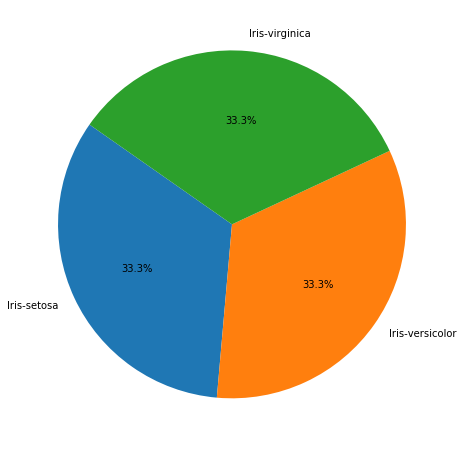

In [60]:
#We make an analysis on the pie graph for nominal values.
for column in nominal_attributes:
    #set plot figure size with figsize parameter.
    plt.figure(figsize=(12,8))
    #Printing column name in data.
    print("Displaying ",data[column].name," in pie graph.")
    # Slices: percentage_of_products.
    countsOfProducts = data[column].value_counts()[:10].values
    slices = countsOfProducts
    # Categories: set categories as first 10 values using value_counts() function.
    categories = data[column].value_counts()[:10].index
    # Plotting the pie-chart.
    plt.pie(slices,
            labels = categories,   #set categories as label name.
            startangle = 145,   #start to display with this angle.
            # To display the percent value using Python string formatting.
            autopct = '%1.1f%%' #String formatting code to use when adding annotations.
           )
    #Calling plot show function.
    plt.show()

In [61]:
#Printing eighteenth message as a h1 title in html code.
printTitle(19)

Correlation Between Numeric Column


In [62]:
#Applying correlation to find out the relationship of numeric values with each other.
numeric_values_for_correlation = datainfo.attribute_datas[(datainfo.attrtype=="numeric") |(datainfo.attrtype=="numerical")]["attrname"].values
#Printing correlated this numeric_values_for_correlation value.
print("numeric_values_for_correlation: ",numeric_values_for_correlation)

numeric_values_for_correlation:  ['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth']


In [63]:
#In addition to the corr operation, Applying this operation.
 
#If the response attribute exists in the nominal array,
if data[response_attributes].name in nominal_attributes:
    #We perform a numeric categorical transformation by applying the labelEncoder to it.
    label_encoder=preprocessing.LabelEncoder()
    data[response_attributes] = label_encoder.fit_transform(data[response_attributes])
    #So, we can make correlation between numeric values and response attribute.
    numeric_values_for_correlation = np.append(numeric_values_for_correlation,data[response_attributes].name)
#Printing the correlation value as a numeric_values_for_correlation.
#print("numeric_values_for_correlation: ",numeric_values_for_correlation)

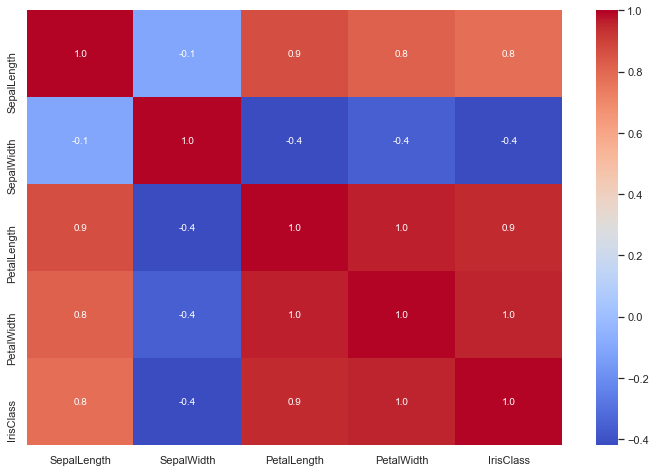

In [64]:
#Selecting numeric_values_for_correlation from data.
data_frame_correlated = data[numeric_values_for_correlation]
#Setting figure size with figsize parameter.
sns.set(rc = {"figure.figsize":(12,8)})

#Applying corr process to df data.
correlation = data_frame_correlated.corr()
#Displaying correlation on heatmap.
sns.heatmap(correlation,
                cmap='coolwarm',#color parameter to show data
                annot=True, #if true,data value will print in each cell.
                fmt=".1f", #String formatting code to use when adding annotations.
                annot_kws={'size':10}, #font size of data values in each cell.
                cbar=True, #Whether to draw a colorbar.
                square=False, #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                xticklabels=correlation.columns.values, #X axis label values is a corr.column.values.
                yticklabels=correlation.columns.values, #Y axis label values is a corr.column.values.
           )
plt.show() #Calling plot show function.

In [65]:
#Printing nineteenth message as a h1 title in html code.
printTitle(20)

Matrix that involves correlation values between numeric columns


In [66]:
#Printing the corr values.
print("corr table: ",display(correlation))

,SepalLength,SepalWidth,PetalLength,PetalWidth,IrisClass
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
IrisClass,0.782561,-0.419446,0.949043,0.956464,1.000000


corr table:  None


In [67]:
#Printing nineteenth message as a h1 title in html code.
printTitle(57)

Analysis for Values of Nominal Attributes


In [68]:
#We perform numerical analysis by grouping nominal attributes with numeric attributes (such as count and mean).
for i,nominal_columns in enumerate(nominal_attributes):
    #Printing nominal features name.
    print("Nominal Features: {} - Mean Of Numeric Features (First 10)".format(nominal_columns))
    #the data to find mean.
    data_grouped = pd.concat([data[numeric_attributes],data[nominal_attributes[i]]],axis=1).groupby(nominal_attributes[i],as_index=False).mean()[:10]
    #Setting sort paremeter with sort_index.
    data_grouped.sort_index(inplace=True)
    #Printing grouped data usigg display library.
    print(display(data_grouped))
    
    #Printing nominal features name.
    print("Nominal Features: {} - Count Of Numeric Features (First 10)".format(nominal_columns))
    #the data to find mean.
    data_grouped = pd.concat([data[numeric_attributes],data[nominal_attributes[i]]],axis=1).groupby(nominal_attributes[i],as_index=False).count()[:10]
    #Setting sort paremeter with sort_index.
    data_grouped.sort_index(inplace=True)
    #Printing grouped data usigg display library.
    print(display(data_grouped))

Nominal Features: IrisClass - Mean Of Numeric Features (First 10)


,IrisClass,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0,5.006,3.418,1.464,0.244
1,1,5.936,2.770,4.260,1.326
2,2,6.588,2.974,5.552,2.026


None
Nominal Features: IrisClass - Count Of Numeric Features (First 10)


,IrisClass,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0,50,50,50,50
1,1,50,50,50,50
2,2,50,50,50,50


None


In [69]:
#Printing twenty first message as a h1 title in html code.
printBoldTitle(66)

Frequency Charts for Nominal(Categorical) Attributes


In [70]:
#For binary attributes, Applying the count operation with bar graph.
for pr in binary_attributes: #for every binary attribute data.
    for category in nominal_attributes: #for every nominal_attributes attribute data for each nominal attribute.
        category_counts = data[category].value_counts() #Applying value_counts() for find count of category data in our data.
        if len(category_counts) < 10:
            #if count of data is smalller 10, Printing category name and category value count.
            print(category_counts)
            print(category)
            plt.figure(figsize=(12,6)) #set figure size using figsize parameter.
            sns.countplot(x = pr, data = data,hue = category)#We show this counted value on countplot by assign pr to x and data to data and categ to hue.
        #Displaying the plot using show function.
        plt.show()

In [71]:
#Printing twenty second message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(58)))
printBoldTitle(68)

Analysis of Missing(Null) Values


In [72]:
#Printing twenty second message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(23)))
print(color.BOLD + getMessageFromMessageCsv(23))

Check null values and processing on data


In [73]:
#Finding the total null values for each attribute in our dataset usign isnull function.
print("data null sum each attribute:\n",data.isnull().sum())

data null sum each attribute:
 SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
IrisClass      0
dtype: int64


In [74]:
#Finding the total null values found in the dataset.
print("data null sum : ",data.isnull().sum().sum())

data null sum :  0


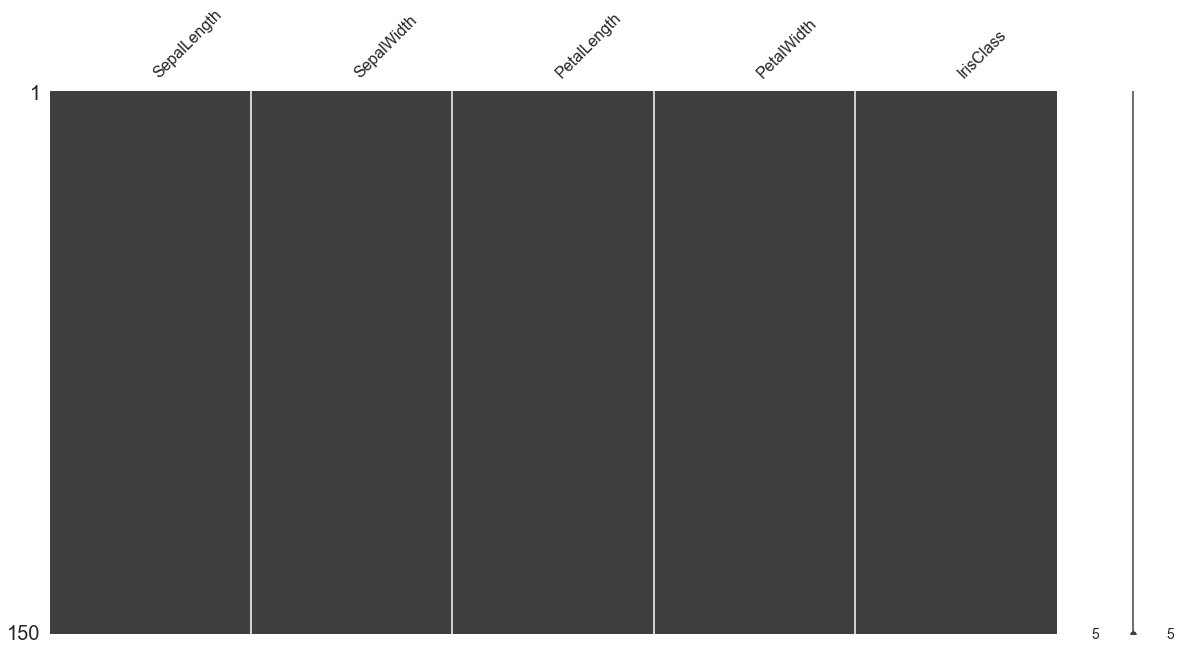

In [75]:
#Examining the total null values for each attribute in our dataset on the graph.
missingno.matrix(data,figsize=(20,10));

In [76]:
#We check whether total null value in data, if is equal zero,heatmap will be displayed.
#if data.isnull().sum().sum() != 0:
#    missingno.heatmap(data,figsize=(15,8))

In [77]:
#Examining the null values for each attribute in our dataset as a percentage in that attribute.
def null_values_table(data):
    #Finding null values for data attribute.
    null_values_sum = data.isnull().sum()
    #We will calculate percentage for that null values on attribute.
    null_values_sum_percentage = 100 * null_values_sum / len(data)
    #Creating table null values count and null values percentage with concat.
    null_values_tables = pd.concat([null_values_sum,null_values_sum_percentage],axis=1)
    #We rename columns of the table with these string.
    null_val_table_result = null_values_tables.rename(columns = {0:"Null Values Sum",1:"% Value"})
    #return the created table.
    return null_val_table_result

In [78]:
#Calling the null_values_table with data parameter.
null_values_table(data)

,Null Values Sum,% Value
SepalLength,0,0.0
SepalWidth,0,0.0
PetalLength,0,0.0
PetalWidth,0,0.0
IrisClass,0,0.0


In [79]:
#We are making scalers for numeric attributes.
for column in numeric_attributes:#for each numeric attribute,Applying below lines. 
    column_type_floated = data[[column]].values.astype(float) #Assigning that column of data values as a float type to in array.
    min_max_scaler_colummn = preprocessing.MinMaxScaler() #Assigning MinMaxScaler() function to a variable.
    scl_val = min_max_scaler_colummn.fit_transform(column_type_floated) #Applying min-max scaler  to the float array.
    data[column] = pd.DataFrame(scl_val) #Creating dataframe with scaled flaot array.

In [80]:
#Display null values
#for col in factor_attributesname:
#    displayNullValue(col)

In [81]:
#We drop the lines with null values with dropna function.
data = data.dropna(axis = 0, how ='any')
#Printing data's shape.
print("data shape : ",data.shape)

data shape :  (150, 5)


In [82]:
#We are reviewing the total null values in our dataset again and print that values.
print("data null sum:\n",data.isnull().sum())

data null sum:
 SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
IrisClass      0
dtype: int64


In [83]:
#Printing twenty third message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(24)))
printBoldTitle(69)

Encoding Nominal Attributes


In [84]:
#nominal attribute degerlerine dummies islei uyguluyoruz.
for col in processing_columns:
    if col in nominal_attributes:
        data = pd.get_dummies(data,columns=[col])

In [85]:
print("data columns",data.columns)

data columns Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'IrisClass'], dtype='object')


In [86]:
#dropping arraydeki attributeleri drop ediyoruz.
data.drop(labels=dropping_columns,axis=1,inplace=True)
print("data columns after dropping",data.columns)

data columns after dropping Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'IrisClass'], dtype='object')


In [87]:
#import os
#os.system('jupyter nbconvert --to html data.ipynb --no-input')
#from run import question
#question()

In [88]:
#We import machine learning libraries.
#Importing RandomForestRegressor from sklearn library.
from sklearn.ensemble import RandomForestRegressor as RFG
#Importing scale,StandardScaler from sklearn library.
from sklearn.preprocessing import scale,StandardScaler
#Importing LinearRegression from sklearn library.
from sklearn.linear_model import LinearRegression 
#Importing DecisionTreeRegressor,DecisionTreeClassifier from sklearn library.
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier 
#Importing Ridge,Lasso,ElasticNet,LogisticRegression from sklearn library..
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LogisticRegression 
#Importing KNeighborsRegressor,KNeighborsClassifier from sklearn library..
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier 
#Importing MLPRegressor,MLPClassifier from sklearn library..
from sklearn.neural_network import MLPRegressor,MLPClassifier 
#Importing RandomForestRegressor,RandomForestClassifier from sklearn library..
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
#Importing GradientBoostingRegressor,GradientBoostingClassifier from sklearn library..
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
#Importing VotingClassifier,VotingRegressor from sklearn library..
from sklearn.ensemble import VotingClassifier,VotingRegressor 
#Importing neighbors from sklearn library..
from sklearn import neighbors 
#Importing Support Vector Regression and Support Vector Classification from sklearn library..
from sklearn.svm import SVR,SVC 
#Importing statsmodels.api library.
import statsmodels.api as sm 
#Importing preprocessing from sklearn library..
from sklearn import preprocessing 
#Importing train_test_split,GridSearchCV,cross_val_score,StratifiedKFold from sklearn library..
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold 
#Importing accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report ,mean_absolute_error from sklearn library.
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report ,mean_absolute_error 
#Importing confusion_matrix from sklearn library.
from sklearn.metrics import confusion_matrix as cm 

In [89]:
#Applying scaler operation to numeric values.
min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#Assigning scaled values to numeric data.
data[numeric_attributes] = min_max_scaler.fit_transform(data[numeric_attributes])

In [90]:
#Printing twenty sixth message as a h1 title in html code.
printTitle(27)

Splitting our data as test and train


In [91]:
#We separate our dataset as response and factor.
#Assigning response_attributes to y.
y = data[response_attributes]
#Assigning data to X.
X = data
#We drop response attribute date from X.
X = X.drop(columns=response_attributes)

In [92]:
#Printing last data's head value usign display.
print("train data head table: ",display(X.head()))

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


train data head table:  None


In [93]:
#We separate our train and test data.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [94]:
#Creating an array to hold the results of the model training values.
model_name_array = [] #Creating this array hold model name.
model_mean_squared_error_values_array = [] #Creating this array hold mean squared error values.
model_mean_absolute_error_values_array = [] #Creating this array hold mean absolute error values.
model_root_mean_squared_error_values_array = [] #Creating this array hold root mean squared error values.
model_r2_score_values_array = [] #Creating this array hold r2 score values..
model_root_mean_squared_error_perc_values_array = []
model_mean_absolute_error_perc_values_array = []
model_r2_score_perc_values_array = []

In [95]:
#Printing initialized above score values.print_error_values function get parameter as _mse,_mae,_rmse, _r_score ,r2_score.
def print_error_values(_mse,_mae,_rmse, _r_score ,r2_score,_rmseper,_maeper,_r2_adjusted):   
    print("Mean Squared Error (MSE): %.2f" % _mse)
    print('Mean Absolute Error (MAE): %.2f' % _mae)
    print('Root Mean Squared Error (RMSE): %.2f' % _rmse)  
    #print('R score :  %.2f' % _r_score)
    print('r2 score :  %.2f' % r2_score)
    print('Mean Absolute Error Percentage (MAEPerc): %.2f' % _maeper)
    print('Root Mean Squared Error Percentage (RMSEPerc): %.2f' % _rmseper)  
    print('r2 score adjusted :  %.2f' % _r2_adjusted)

In [96]:
#this print_mean_squared_error_values function get model_name_array,X_test,y_test as paremeters to find Mean Squared Error value.
def print_mean_squared_error_values(model_name_array,X_test,y_test):
    #We predict the X_test data and assign it to y_pred.
    y_pred = model_name_array.predict(X_test)
    #We use the np.sqrt function to compare y_test,y_pred by using mean_squared_error.
    mse = np.sqrt(mean_squared_error(y_test,y_pred))
    #Printing Mean Squared Error value. 
    print("Mean Squared Error (MSE): %.2f" % mse)

In [97]:
class RegressionMetrics(object):
    mse  = []
    mae = []
    rmse = []    
    r_score = []
    r2_score = []    
    rmseper = []    
    maeper = []    
    r2_adjusted = []    
    
    def __init__(self):
        pass

In [98]:
class FetchRegressionMetrics:     

    regressionMetrics = RegressionMetrics()
    
    # parameterized constructor
    def __init__(self, X_train,y_train,X_test,y_test,cross_validation_model):

        self.cross_validation_model = cross_validation_model
        
        self.get_regression_metrics()
        
    def get_regression_metrics(self):
        y_pred = self.cross_validation_model.predict(X_test)
   
        #We will calculate mean_squared_error value between y_test,y_pred.
        RegressionMetrics.mse = np.sqrt(mean_squared_error(y_test,y_pred))
        #We will calculate mean_absolute_error value between y_test,y_pred.
        RegressionMetrics.mae = mean_absolute_error(y_test,y_pred)
        #We will calculate root_mean_squared_error value between y_test,y_pred.
        RegressionMetrics.rmse = np.sqrt(RegressionMetrics.mse)
        #We will calculate r_score value between y_test,y_pred.
        RegressionMetrics.r_score = round(self.cross_validation_model.score(X_train, y_train),2)
        #We will calculate r2_score value between y_test,y_pred.
        RegressionMetrics.r2_score = round(r2_score(y_test,y_pred),2)

        RegressionMetrics.rmseper = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100

        y_true, y_pred = np.array(y_test), np.array(y_pred)
        RegressionMetrics.maeper = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        RegressionMetrics.r2_adjusted = 1 - (1-self.cross_validation_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)         
 
    def returnRegressionMetrics(self):
        return self.regressionMetrics
 



In [99]:
#Creating GridSearchCV_ForRegression_fit_models function to apply GridSearchCV algorithm.
def GridSearchCV_ForRegression_fit_models(regression_model,params,X_train,y_train,X_test,y_test,appender_model):
    #Now, Applying GridSearchCV. Assign retrieved parameter GridSearchCV parameters and fit train data.
    cross_validation_model = GridSearchCV(estimator = regression_model,param_grid = params, cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)
    #Printing best params for that GridSearchCV.
    print('Best Params: ', cross_validation_model.best_params_)

    #We predict X_test data.
    #y_pred = cross_validation_model.predict(X_test)

    fetchRegressionMetricsClass = FetchRegressionMetrics(X_train,y_train,X_test,y_test,cross_validation_model)
    fetchRegressionMetrics = fetchRegressionMetricsClass.returnRegressionMetrics()

     #We will calculate mean_squared_error value between y_test,y_pred.
    mse = fetchRegressionMetrics.mse
    #We will calculate mean_absolute_error value between y_test,y_pred.
    mae = fetchRegressionMetrics.mae
    #We will calculate root_mean_squared_error value between y_test,y_pred.
    rmse =fetchRegressionMetrics.rmse
    #We will calculate r_score value between y_test,y_pred.
    r_score = fetchRegressionMetrics.r_score
    #We will calculate r2_score value between y_test,y_pred.
    _r2_score = fetchRegressionMetrics.r2_score
    
    rmseper = fetchRegressionMetrics.rmseper
       
    maeper = fetchRegressionMetrics.maeper
    
    r2_adjusted = fetchRegressionMetrics.r2_adjusted
    
    #To print all these values, Calling print_error_values function.
    print_error_values(mse,mae,rmse, r_score ,_r2_score,rmseper,maeper,r2_adjusted)
    
    #We added these score values created array.
    model_name_array.append(appender_model)
    model_mean_squared_error_values_array.append(mse)
    model_mean_absolute_error_values_array.append(mae)
    model_root_mean_squared_error_values_array.append(rmse)
    model_r2_score_values_array.append(_r2_score)
    model_root_mean_squared_error_perc_values_array.append(rmseper)
    model_mean_absolute_error_perc_values_array.append(maeper)
    model_r2_score_perc_values_array.append(r2_adjusted)

In [100]:
#Printing twenty fourth message as a h1 title in html code.
#HTML('<h3>{}</h3>'.format(getMessageFromMessageCsv(59)))
#printTitle(59)

In [101]:
#Applying the linear Regression model.
def linear_regression_function(X_train,y_train,X_test,y_test, test_size=0.33, random_state=0):    
    
    #Creating LinearRegression model.
    linear_regression_model = LinearRegression()
    #We will fit X_train and y_train.
    linear_regression_model.fit(X_train, y_train)

    #Printing linear regression model detail.
    print("linear_regression_model model",linear_regression_model)

    #Finding R score for this linear regression using linear_regression_model.score(X_train, y_train).
    #print("R score: {0}".format(round(linear_regression_model.score(X_train, y_train),2)))
    #Printing Intercept values to interpretation the regression.
    print("Intercept: {0}".format(round(linear_regression_model.intercept_),))
    #Creating coefficient of regression and dataframe using X.columns,regression coefficient.
    linear_regression_coefficients = pd.DataFrame({'feature':X.columns, 'coef':linear_regression_model.coef_})
    #We sort values of regression coefficient.
    linear_regression_coefficients.sort_values(by=['coef'],ascending=False)
        
    #Calling  function to calculate mean squared error.
    print_mean_squared_error_values(linear_regression_model,X_test,y_test)
    
    #Parameters for GridSearchCV Linear Regression.
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    
    #Calling GridSearchCV_ForRegression_fit_models function.
    GridSearchCV_ForRegression_fit_models(linear_regression_model,parameters,X_train,y_train,X_test,y_test,"Linear Regression")
     
    print(linear_regression_coefficients)

In [102]:
#Calling the function that implements the linear regression model.
def linear_regression_function_caller(): 
    #Creating chart to print twenty seventh message as a h1 title in html code.
    printBoldTitle(28)
    #Calling linear_regression_function().
    linear_regression_function(X_train,y_train,X_test,y_test)

In [103]:
#Create display_R2_score to display R2 Score Values of models.
def display_R2_score(): 
    #assign model_name_array array to list_model_name_array_r2_score
    list_model_name_array_r2_score = model_name_array
    #assign model_r2_score_values_array array to list_model_r2_score_values_array_score
    list_model_r2_score_values_array_score = model_r2_score_values_array
    #Creating dataframe with list_model_name_array_r2_score and list_model_r2_score_values_array_score.
    data_frame = pd.DataFrame({'list_model_name_array_r2_score':list_model_name_array_r2_score, 'list_model_r2_score_values_array_score':list_model_r2_score_values_array_score})
    #Sorting dataframe created by R2 Score Values.
    data_frame.sort_values(by = "list_model_r2_score_values_array_score",ascending=True,inplace=True)

    #Set seaborn theme.
    sns.set(style="darkgrid",)
    #Set create barplot.
    ax = sns.barplot(x="list_model_r2_score_values_array_score", y="list_model_name_array_r2_score", data=data_frame)
    #Set x axis label name.
    plt.xlabel("Regresion Model r2 Score")
    #Set y axis label name.
    plt.ylabel("Regresion Model Name")
    #Displaying plot with show() function.
    plt.show()

In [104]:
#Create display_mean_absolute_error_values to display Mean Absolute Error Values of models.
def display_mean_absolute_error_values():
    #assign model_name_array array to list_model_name_array_mae
    list_model_name_array_mae = model_name_array
    #assign model_mean_absolute_error_values_array array to list_model_mean_absolute_error_values_array
    list_model_mean_absolute_error_values_array = model_mean_absolute_error_values_array
    #Creating dataframe with list_model_name_array_mae and list_model_mean_absolute_error_values_array.
    data_frame = pd.DataFrame({'list_model_name_array_mae':list_model_name_array_mae, 'list_model_mean_absolute_error_values_array':list_model_mean_absolute_error_values_array})
    #Sorting dataframe created byMean Absolute Error Values.
    data_frame.sort_values(by = "list_model_mean_absolute_error_values_array",ascending=True,inplace=True)

    #Set seaborn theme.
    sns.set(style="darkgrid",)
    #Set create barplot.
    ax = sns.barplot(x="list_model_mean_absolute_error_values_array", y="list_model_name_array_mae", data=data_frame)
    #Set x axis label name.
    plt.xlabel("Regresion Model Mean Absolute Error")
    #Set y axis label name.
    plt.ylabel("Regresion Model Name")
    #Displaying plot with show() function.
    plt.show()

In [105]:
#Create display_mean_squared_error_values to display Mean Squared Error Values of models.
def display_mean_squared_error_values():
    #assign model_name_array array to list_model_name_array_mse
    list_model_name_array_mse = model_name_array
    #assign model_mean_squared_error_values_array array to list_model_mean_squared_error_values_array
    list_model_mean_squared_error_values_array = model_mean_squared_error_values_array
    #Creating dataframe with list_model_name_array_mse and list_model_mean_squared_error_values_array.
    data_frame = pd.DataFrame({'list_model_name_array_mse':list_model_name_array_mse, 'list_model_mean_squared_error_values_array':list_model_mean_squared_error_values_array})
    #Sorting dataframe created by Mean Squared Error Values.
    data_frame.sort_values(by = "list_model_mean_squared_error_values_array",ascending=True,inplace=True)

    #Set seaborn theme.
    sns.set(style="darkgrid",)
    #Set create barplot.
    ax = sns.barplot(x="list_model_mean_squared_error_values_array", y="list_model_name_array_mse", data=data_frame)
    #Set x axis label name.
    plt.xlabel("Regresion Model Mean Squared Error")
    #Set y axis label name.
    plt.ylabel("Regresion Model Name")
    #Displaying plot with show() function.
    plt.show()

In [106]:
#Create display_root_mean_squared_error_values to display Root Mean Squared Error Values of models.
def display_root_mean_squared_error_values():
    #assign model_name_array array to list_model_name_array_rmse
    list_model_name_array_rmse = model_name_array
    #assignmodel_root_mean_squared_error_values_array array to list_model_root_mean_squared_error_values_array
    list_model_root_mean_squared_error_values_array = model_root_mean_squared_error_values_array
    #Creating dataframe with list_model_name_array_rmse and list_model_root_mean_squared_error_values_array.
    data_frame = pd.DataFrame({'list_model_name_array_rmse':list_model_name_array_rmse, 'list_model_root_mean_squared_error_values_array':list_model_root_mean_squared_error_values_array})
    #Sorting dataframe created by Root Mean Squared Error Values.
    data_frame.sort_values(by = "list_model_root_mean_squared_error_values_array",ascending=True,inplace=True)

    #Set seaborn theme.
    sns.set(style="darkgrid",)
    #Set create barplot.
    ax = sns.barplot(x="list_model_root_mean_squared_error_values_array", y="list_model_name_array_rmse", data=data_frame)
    #Set x axis label name.
    plt.xlabel("Regresion Model Root Mean Squared Error")
    #Set y axis label name.
    plt.ylabel("Regresion Model Name")
    #Displaying plot with show() function.
    plt.show()

In [107]:
#Calling the display functions on the chart.
def displayer_regression():
    #Creating chart to print fortieth message as a h1 title in html code.
    
    printTitle(41)
    #Calling to display_R2_score function.
    display_R2_score()
    #Creating chart to print forty first message as a h1 title in html code.
    
    printTitle(42)
    #Calling to display_mean_absolute_error_values function.
    display_mean_absolute_error_values()
    #Creating chart to print forty second message as a h1 title in html code.
   
    printTitle(43)
    #Calling to display_mean_squared_error_values function.
    display_mean_squared_error_values()
    #Creating chart to print forty third message as a h1 title in html code.
  
    printTitle(44)
    #Calling to display_root_mean_squared_error_values function.
    display_root_mean_squared_error_values()

In [108]:
#Calling Regression Functions to fit models.
def runRegressionOnData():
    #Calling linear_regression_function_caller function.
    linear_regression_function_caller()    
    #Calling displayer_regression function.
    #displayer_regression()

In [109]:
#Creating an array to compare model accuracy values.
models_ = pd.DataFrame(columns=['Models', 'Accuracy'])

In [110]:
#Observing the predicted values in the roc curve.
def roc_values_displayer(model,y_test):
    #Creating Compute Area Under the Receiver Operating Characteristic Curve value with y_test, X_test.
    #ROC curve --> (receiver operating characteristic curve).
    #AUC curve --> (Area under the ROC Curve).
    logit_roc_auc = roc_auc_score(y_test,model.predict(X_test))
    #Creating Compute Receiver operating characteristic value with y_test,X_test.
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    #Creating plot figure.
    plt.figure()
    #Assigning plot parameter.
    plt.plot(false_positive_rate,true_positive_rate,label="AUC (area = %0.3f)" % logit_roc_auc , color="navy")
    #Editting plot.
    plt.plot([0,1],[0,1],"r--")
    #Setting xlim parameter of the plot.
    plt.xlim([0.0,1.0])
    #Setting ylim parameter of the plot.
    plt.ylim([0.0,1.05])
    #Setting title of the plot.
    plt.title("Receiver operating characteristic")
    #Setting x axis label of the plot.
    plt.xlabel("False Positive Rate")
    #Setting y axis label of the plot.
    plt.ylabel("True Positive Rate")
    #Setting legend title of the plot.
    plt.legend(loc="lower right")
    #Displaying plot with show() function.
    plt.show()

In [111]:
#We observe the predicted values on the confusion matrix.
def confusion_matrix_values_displayer(confusion_matrix,score):
    #score = round(accuracy_score(y_test, y_pred), 5)
    #Setting plot figure size.
    plt.figure(figsize=(8,4))
    #Creating seaborn heatmap graph with some parameters.
    sns.heatmap(confusion_matrix, annot=True, fmt=".0f")
    #Setting x axis label of the plot.
    plt.xlabel('Predicted Values')
    #Setting y axis label of the plot.
    plt.ylabel('Actual Values')
    #Setting title of the plot.
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    #Displaying plot with show() function.
    plt.show()

In [112]:
#To print model score,best params,best estimator, that function was created.
def print_model_details(model_name_array,best_score_,best_params_,best_estimator_):
    #Printing best score of model.
    print("{} best_score : {}".format(model_name_array,best_score_))
    #Printing best params of model.
    print("{} best_params : {}".format(model_name_array,best_params_))
    #Printing best estimator of model.
    print("{} best_estimator : {}".format(model_name_array,best_estimator_))

In [113]:
#To add model name and model score to models dataframe,it was created.
def append_modelName_to_models(modelName,score):
    #Created models_ variable to hold models_ that added classification model it.
    global models_
    #Adding created dataframe to models_ using modelName, and score.
    models_ = models_.append( {'Models' : modelName , 'Accuracy' : score}, ignore_index=True,sort=False)

In [114]:
class ClassficationMetrics:
    TrueNegative = 0
    FalsePositive = 0 
    FalseNegative = 0
    TruePositive = 0
    Specificity = 0
    Recall = 0
    NPV = 0
    Precision = 0
    ClassficationMetrics = 0
    F1Score = 0
    MCC = 0
    BalancedAccuracy = 0

In [115]:
class FetchClassficationMetrics():    
    
    classficationMetrics = ClassficationMetrics()
    
    def __init__(self,y_test,y_pred,confusion_matrix):   
        self.y_test = y_test
        self.y_pred = y_pred
        ravel_conf_matrix = confusion_matrix.ravel()
        if len(ravel_conf_matrix)==4:            
            self.TN,self.FP,self.FN,self.TP = ravel_conf_matrix
            if self.TN!= 0 and self.FP != 0 and  self.FN != 0 and self.TP!= 0:
                self.get_classfication_metricss()
        
    def get_classfication_metricss(self):
        ClassficationMetrics.TrueNegative = self.TN
        ClassficationMetrics.FalsePositive = self.FP
        ClassficationMetrics.FalseNegative = self.FN
        ClassficationMetrics.TruePositive = self.TP
        ClassficationMetrics.Specificity = self.TN/(self.FP+self.TN)
        ClassficationMetrics.Precision = self.TP/(self.TP+self.FP)
        ClassficationMetrics.Recall = self.TP / (self.FN+self.TP)
        ClassficationMetrics.F1Score = 2 * (ClassficationMetrics.Precision * ClassficationMetrics.Recall)/ (ClassficationMetrics.Precision + ClassficationMetrics.Recall)
        ClassficationMetrics.Accuracy = accuracy_score(self.y_test, self.y_pred)
        ClassficationMetrics.MCC = ((self.TP*self.TN)-(self.FP*self.FN))/( np.sqrt((self.TP+self.FP)*(self.TP+self.FN)*(self.TN+self.FP)*(self.TN+self.FN)) )
        Sensitivity= self.TP / (self.TP + self.FN)
        ClassficationMetrics.BalancedAccuracy = ( Sensitivity+  ClassficationMetrics.Specificity)/2
        self.printRegressionMetrics()

    def returnClassficationMetrics(self):
        return self.classficationMetrics
    
    def printRegressionMetrics(self):
        print("TrueNegative",ClassficationMetrics.TrueNegative)
        print("FalsePositive",ClassficationMetrics.FalsePositive)
        print("FalseNegative",ClassficationMetrics.FalseNegative)
        print("TruePositive",ClassficationMetrics.TruePositive)
        print("Specificity",ClassficationMetrics.Specificity)
        print("Precision",ClassficationMetrics.Precision)
        print("Recall",ClassficationMetrics.Recall)
        print("F1Score",ClassficationMetrics.F1Score)
        print("Accuracy",ClassficationMetrics.Accuracy)
        print("MCC",ClassficationMetrics.MCC)
        print("BalancedAccuracy",ClassficationMetrics.BalancedAccuracy)

In [116]:
#Creating GridSearchCV_ForClassification_fit_models function to apply GridSearchCV algorithm for classification.
def GridSearchCV_ForClassification_fit_models(classifier,param,X_train,y_train,X_test,y_test,model_cv_name,appender_model):
    #Now, Applying GridSearchCV. Assign retrieved parameter GridSearchCV parameters and fit train data.
    cross_validation_models = GridSearchCV(classifier,param,cv = StratifiedKFold(n_splits = 10), scoring = "accuracy",n_jobs=-1,verbose=2).fit(X_train,y_train)
    
    #Calling print_model_details function to print details.
    print_model_details("model_cv_name: ",cross_validation_models.best_score_,cross_validation_models.best_params_,cross_validation_models.best_estimator_)

    #Predicting X_test data.
    y_pred = cross_validation_models.predict(X_test)

    #Finding accuracy_score with y_test,y_pred.
    score = round(accuracy_score(y_test, y_pred), 5)
    #Printing accuracy_score value.
    print("accuracy_score",score)
    
    #Calling append_modelName_to_models sending appender_model and score.
    append_modelName_to_models(appender_model,score)
    
    #This function are Returning fitted Grid Search CV model.
    return cross_validation_models

In [117]:
#Created this function to print details and display plots.
def print_report_for_classifier(X_test,y_test,classifier):
    #Applying predict to X_test and hold in y_pred.
    y_pred = classifier.predict(X_test)
    
    #Creating confusion matrix y_test and y_pred.
    confusion_matrix = cm(y_test,y_pred)
    #Printing confusion matrix values.
    print(confusion_matrix)
        
    fetchClassficationMetrics = FetchClassficationMetrics(y_test,y_pred,confusion_matrix)
    
    #Finding accuracy_score of model.
    score = round(accuracy_score(y_test, y_pred), 5)
    #Printing accuracy_score.
    print("accuracy_score",score)

    #Calling confusion_matrix_values_displayer to display confusion matrix values.
    confusion_matrix_values_displayer(confusion_matrix,score)

    #Printing classification_report of modelsç
    print(classification_report(y_test,y_pred))

    #Calling confusion_matrix_values_displayer to display ROC curve values.
    if len(confusion_matrix.ravel())==4:
        roc_values_displayer(classifier,y_test)

In [118]:
#Applying Decision Tree CLassification model.
from sklearn import tree
def decision_tree_classification_function():
    
    #Creating Decision Tree CLassification model. We will fit X_train and y_train.   
    decision_tree_classification_model = DecisionTreeClassifier().fit(X_train,y_train)
    #Printing Decision Tree CLassification model detail. 
    print("decision_tree_regression_model",decision_tree_classification_model)
    
    #Calling print_report_for_classifier function to display model details on graph.
    print_report_for_classifier(X_test,y_test,decision_tree_classification_model)

    #Creating Decision Tree CLassification model.
    #decision_tree_classification_model = DecisionTreeClassifier()

    #Parameters for GridSearchCV on Decision Tree CLassification model.    
    decision_tree_classification_model_params = {"max_depth":[1,3,5,8,10],
                    "min_samples_split":[2,3,5,10,20,50]}

    #Calling GridSearchCV_ForClassification_fit_models function.
    GridSearchCV_ForClassification_fit_models(decision_tree_classification_model,decision_tree_classification_model_params,X_train,y_train,X_test,y_test,"cart_cross_validation_model","Decision Tree CLassification")    
    #tree.plot_tree(decision_tree_classification_model)
    print("\nDecision tree rules\n")
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(decision_tree_classification_model, 
                   filled=True)

In [119]:
#Calling the function that implements the Decision Tree CLassification model.
def decision_tree_classification_function_caller(): 
    #Creating chart to print forty eighth message as a h1 title in html code.
           
    printTitle(49)
    #Calling decision_tree_classification_function().
    decision_tree_classification_function()

In [120]:
#Comparing the accuracy values of Classification models.
def comparing_accuracy_classification_models():
    #Setting plot figure size.
    plt.figure(figsize=(8,6))
    #Creating set bar plot with parameters.
    sns.barplot(x="Accuracy",y = "Models",data = models_)
    #Setting x axis label name.
    plt.xlabel("Accuracy(%)")
    #Setting plot title.
    plt.title("Accuracy Rates of Models")

In [121]:
#Calling the function that performs the predict operation.
def comparing_accuracy_classification_models_displayer():
    #Creating chart to print fifty fourth message as a h1 title in html code.
   
    printTitle(55)
    #Calling Displayer().
    comparing_accuracy_classification_models()

In [122]:
#Calling the Classification functions.
def runClassificationOnData():   
    #Calling decision_tree_classification_function_caller that performs that classification.
    decision_tree_classification_function_caller()    
    #Calling DisplayerClassifier that perform predictins.
    #comparing_accuracy_classification_models_displayer()

Decision Tree Classification
decision_tree_regression_model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
accuracy_score 1.0


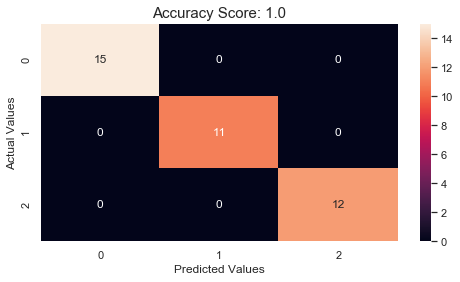

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


model_cv_name:  best_score : 0.9371212121212119
model_cv_name:  best_params : {'max_depth': 3, 'min_samples_split': 10}
model_cv_name:  best_estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
accuracy_score 1.0

Decision tree rules



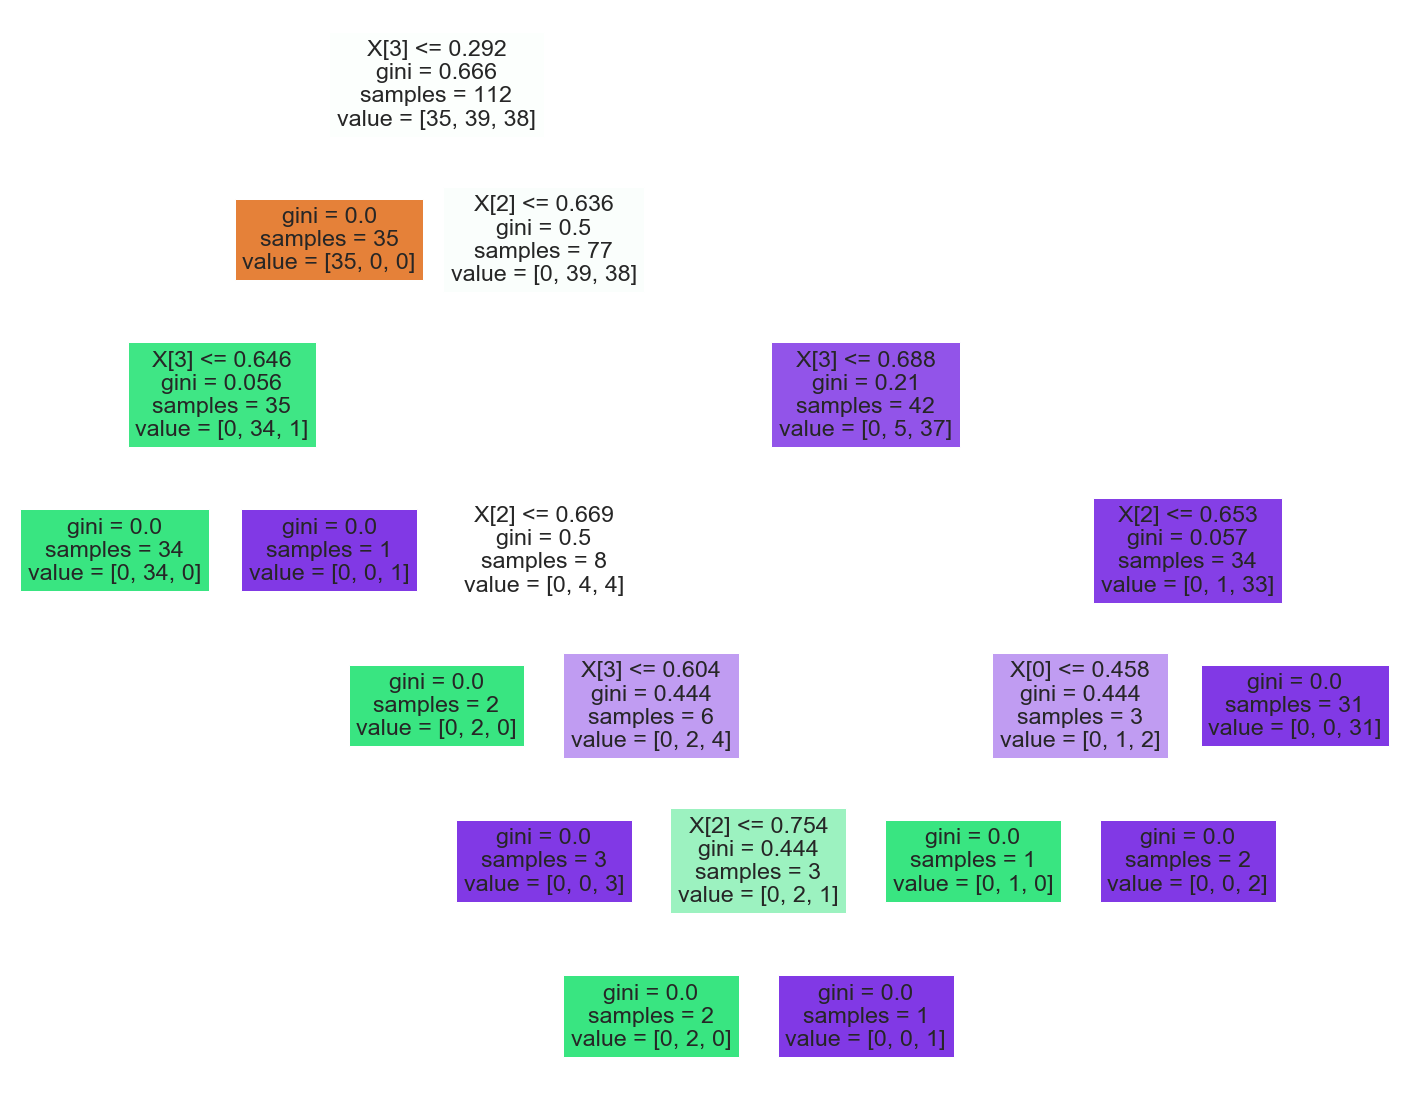

In [123]:
#Running regression and classification models.
#Here, we are calling the functions created above with a single function.
if data[response_attributes].name in nominal_attributes:
    #if response_attributes is within nominal_attributes(i.e:category), call classification(RunClassifier), 
    runClassificationOnData()
else:
    #otherwise call regression(runRegressionOnData).
    runRegressionOnData()

In [124]:
#Importing os library.
import os
#this line create html data excluding input.
os.system('jupyter nbconvert --to pdf Data_Analysis.ipynb --no-input')

0